In [49]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                                    n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=30)

In [50]:
x_data=pd.DataFrame(x)

In [51]:
x_data.describe()

,0,1
count,100.000000,100.000000
mean,-1.916779,0.060770
std,3.095689,0.938258
min,-5.797260,-2.980924
25%,-4.893535,-0.544073
50%,-2.120981,0.172038
75%,1.188630,0.710422
max,2.768850,2.061587


In [52]:
import matplotlib.pyplot as plt

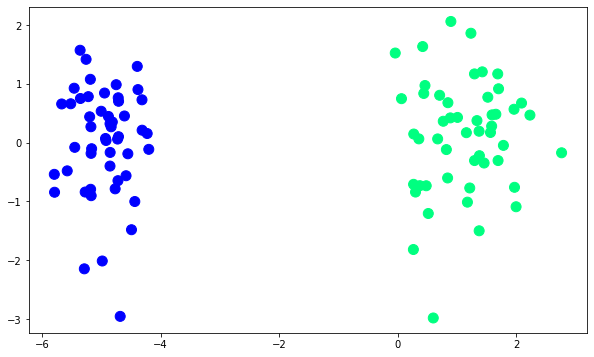

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [54]:
def perceptron(x,y):
    x=np.insert(x,0,1,axis=1)
    weights=np.ones(x.shape[1])
    lr=0.1
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(x[j],weights))
        weights=weights+lr*(y[j]-y_hat)*x[j]
    return weights[0],weights[1:]

In [55]:
def step(z):
    return 1 if z>0 else 0

In [56]:
intercept,coef=perceptron(x,y)

In [57]:
intercept,coef

(1.2000000000000002, array([1.1204053 , 0.40381514]))

In [58]:
m=-(coef[0]/coef[1])
b=-(intercept/coef[1])

In [59]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

(-3.0, 2.0)

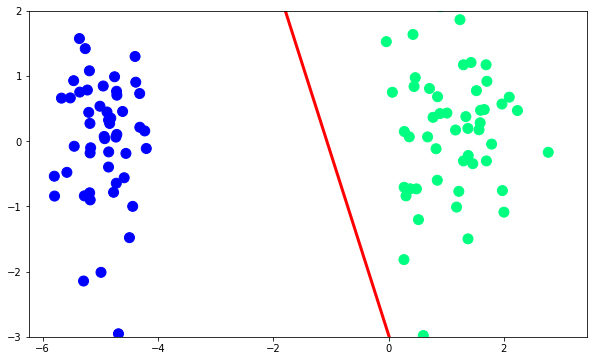

In [60]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lor=LogisticRegression()
lor.fit(x,y)

LogisticRegression()

In [63]:
m=-(lor.coef_[0][0]/lor.coef_[0][1])
b=-(lor.intercept_/lor.coef_[0][1])

In [64]:
x_input_1=np.linspace(-3,3,100)
y_input_1=m*x_input+b

(-3.0, 2.0)

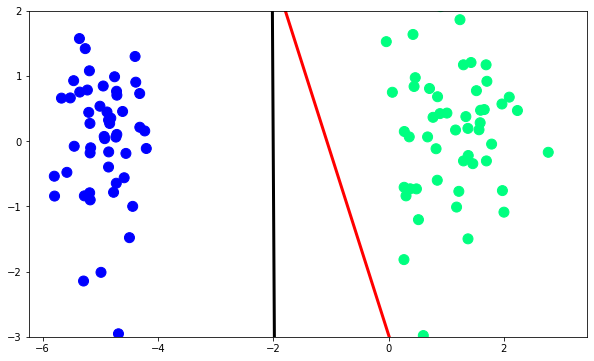

In [65]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input_1,y_input_1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [71]:
def perceptron(x,y):
    x=np.insert(x,0,1,axis=1)
    weights=np.ones(x.shape[1])
    lr=0.1
    
    for i in range(500):
        j=np.random.randint(0,100)
        y_hat=sigmoid(np.dot(x[j],weights))
        weights=weights+lr*(y[j]-y_hat)*x[j]
    return weights[0],weights[1:]

In [72]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [73]:
intercept,coef=perceptron(x,y)

In [74]:
intercept,coef

(2.2051236325686356, array([2.04423985, 0.19628762]))

In [75]:
m=-(coef[0]/coef[1])
b=-(intercept/coef[1])

In [76]:
x_input2=np.linspace(-3,3,100)
y_input2=m*x_input+b

(-3.0, 2.0)

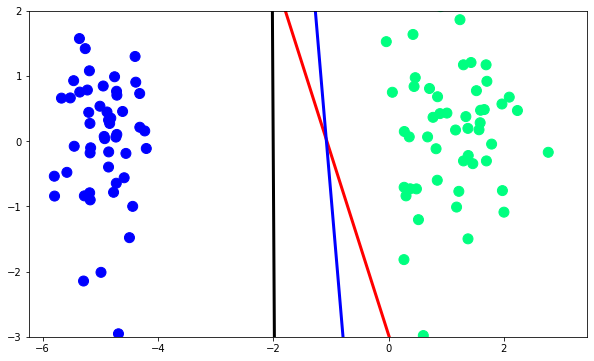

In [79]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input_1,y_input_1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='blue',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [90]:
def perceptron(x,y):
    m=[]
    b=[]
    x=np.insert(x,0,1,axis=1)
    weights=np.ones(x.shape[1])
    lr=0.1
    
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=sigmoid(np.dot(x[j],weights))
        weights=weights+lr*(y[j]-y_hat)*x[j]
        m.append(-(weights[1]/weights[2]))
        b.append(-weights[0]/weights[2])
    return m,b

In [91]:
m,b=perceptron(x,y)

In [92]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


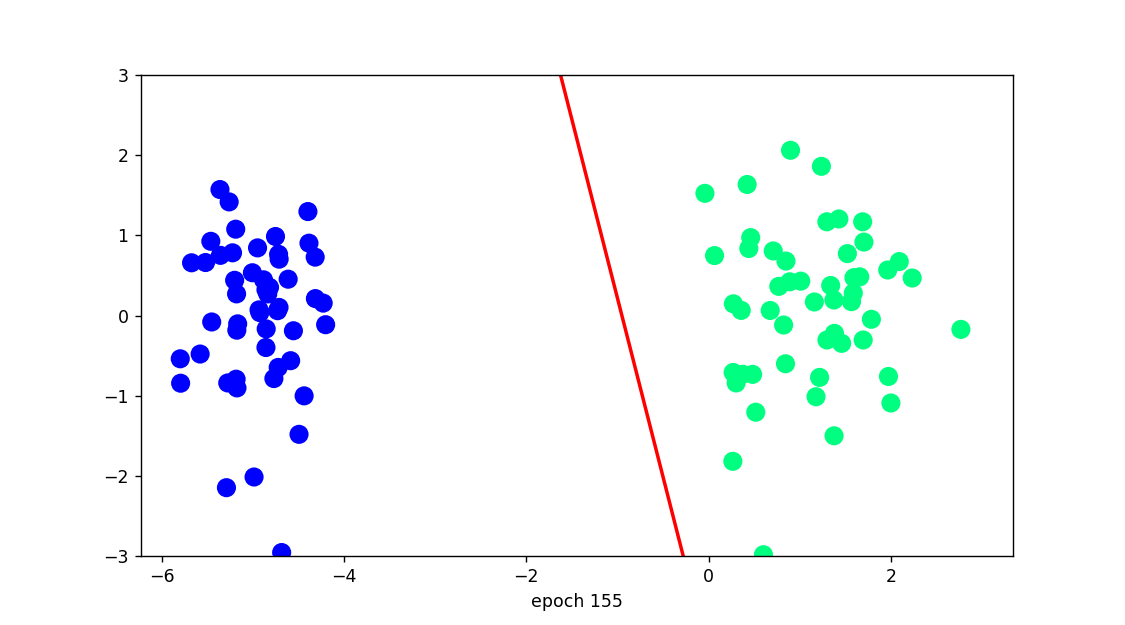

In [93]:
fig,ax=plt.subplots(figsize=(9,5))
x_i=np.arange(-3,3,0.1)
y_i=m[0]*x_i+b[0]
ax.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
line,=ax.plot(x_i,x_i*m[0]+b[0],'r-',linewidth=2)
plt.ylim(-3,3)
def update(i):
    label='epoch {0}'.format(i+1)
    line.set_ydata(x_i*m[i]+b[i])
    ax.set_xlabel(label)
anim=FuncAnimation(fig,update,repeat=True,frames=200,interval=100)